In [ ]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def connect():
    #parameter format for local use
    params = {
    'dbname':'hmda',
    'user':'fureym',
    'password':'',
    'host':'localhost',}
    #connect_string = "dbname=%s user=%s host=%s password =%s" %(dbname, user, host, password) #set a string for connection to SQL
    try:
        conn = psycopg2.connect(**params)
        print("i'm connected")
        #return conn.cursor(cursor_factory=psycopg2.extras.DictCursor) #return a dictionary cursor object
        return conn.cursor()
    except psycopg2.Error as e: #if database connection results in an error print the following
        print("I am unable to connect to the database: ", e)

In [3]:
connect()

i'm connected


<cursor object at 0x119958140; closed: 0>

In [4]:
#Defining a file analysis function that passes in a SQL command file and a year.  
def file_analysis(sql, year):
    sql_base = ""
    with open(sql) as in_sql:
        for line in in_sql.readlines():
            sql_base = sql_base + line.strip("\n")
            sql_base=sql_base.format(year=year)
    cur = connect()
    cur.execute(sql_base)
    data = cur.fetchall()
    data_dict = {"year": data[0][0],
                "output":data[0][1]}
    return data_dict

#Defining a date iteration function that passes in a SQL command file as a string 
#and two years for a range of dates.
def date_iteration(sql, d1, d2):
    dates = list(range(d1, (d2+1)))
    analysis_list = []
    for date in dates:
        analysis_list.append(file_analysis(sql, date))
    analysis_df = pd.DataFrame(analysis_list)
    return analysis_df

#Defining a function that creates a bar chart and an an accompanying table of values
#bar chart function that passes in a SQL command file as a string,
#two years for a range of dates, a title for the chart, an x-title, a ytitle, and a color. 
def bar_chart(sql, d1, d2, title, xtitle, ytitle, color):
    analysis_df2 = date_iteration(sql, d1, d2)
    x = analysis_df2['year']
    y = analysis_df2['output']
    plt.bar(x, y, color = color)
    plt.title(title)
    plt.ylabel(ytitle)
    plt.xlabel(xtitle)
    plt.yticks=([])
    analysis_df2['output'] = analysis_df2.apply(lambda x: "{:,}".format(x['output']), axis=1)
    analysis_df2['year'] = x
    print(analysis_df2.head(20))
    return plt.show()

i'm connected
i'm connected
i'm connected
i'm connected
i'm connected
i'm connected
i'm connected
i'm connected
i'm connected
i'm connected
i'm connected
        output  year
0   34,155,360  2006
1   26,702,092  2007
2   17,531,240  2008
3   19,574,492  2009
4   16,751,980  2010
5   14,906,446  2011
6   18,752,061  2012
7   17,013,337  2013
8   11,875,464  2014
9   14,374,184  2015
10  16,332,987  2016


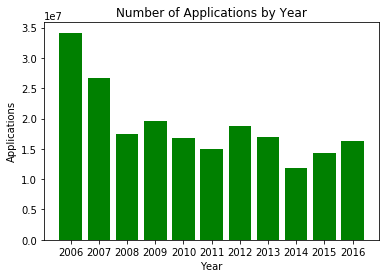

In [5]:
bar_chart("lar_count.sql", 2006, 2016, "Number of Applications by Year", "Year", "Applications", "green")